In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
   
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

In [2]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt
    
import numpy as np
import pandas as pd

from neurolib.models.wc import WCModel
from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.exploration import BoxSearch

# a nice color map
plt.rcParams['image.cmap'] = 'magma'
#plasma

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [3]:
#process data
def process_data (parameters_array):
    parameter_1 = []
    parameter_2 = []
    for i in range(len(parameters_array)):
        #print(i)
        parameter_1.append(parameters_array[i][0])
        parameter_2.append(parameters_array[i][1])
    return parameter_1, parameter_2

In [4]:
#path to results
directory = "/Users/pamirozsuna/Desktop/pamir_ma/results/Exploration_SCZ/exploration/"
gbc_exc_ext_cie = np.load(directory + "gbc_exc_ext_cie.npy")
gbc_exc_ext_cei = np.load(directory + "gbc_exc_ext_cei.npy")
gbc_exc_ext_cii = np.load(directory + "gbc_exc_ext_cii.npy")
gbc_exc_ext_kgl = np.load(directory + "gbc_exc_ext_kgl1.npy")
gbc_exc_ext_sigma_ou = np.load(directory + "gbc_exc_ext_sigma_ou1.npy")

gbc_kgl_sigma_ou = np.load(directory + "gbc_kgl_sigma_ou1.npy")

gbc_cei_kgl = np.load(directory + "gbc_cei_kgl1.npy")
gbc_cei_sigma_ou = np.load(directory + "gbc_cei_sigma_ou1.npy")

gbc_cie_cii = np.load(directory + "gbc_cie_cii.npy")
gbc_cie_sigma_ou = np.load(directory + "gbc_cie_sigma_ou1.npy")
gbc_cie_kgl = np.load(directory + "gbc_cie_sigma_ou1.npy")

gbc_cii_kgl = np.load(directory + "gbc_cii_kgl1.npy")
gbc_cii_sigma_ou = np.load(directory + "gbc_cii_sigma_ou1.npy")

gbc_cei_cii = np.load(directory + "gbc_cei_cii.npy")
gbc_cei_cie = np.load(directory + "gbc_cei_cie.npy")

parameters_exc_ext_cie = np.load(directory + "parameters_exc_ext_cie.npy")
parameters_exc_ext_cei = np.load(directory + "parameters_exc_ext_cei.npy")
parameters_exc_ext_cii = np.load(directory + "parameters_exc_ext_cii.npy")
parameters_exc_ext_kgl = np.load(directory + "parameters_exc_ext_kgl1.npy")
parameters_exc_ext_sigma_ou = np.load(directory + "parameters_exc_ext_sigma_ou1.npy")

parameters_kgl_sigma_ou = np.load(directory + "parameters_kgl_sigma_ou1.npy")

parameters_cei_kgl = np.load(directory + "parameters_cei_kgl1.npy")
parameters_cei_sigma_ou = np.load(directory + "parameters_cei_sigma_ou1.npy")

parameters_cie_cii = np.load(directory + "parameters_cie_cii.npy")
parameters_cie_kgl = np.load(directory + "parameters_cie_kgl1.npy")
parameters_cie_sigma_ou = np.load(directory + "parameters_cie_sigma_ou1.npy")

parameters_cii_kgl = np.load(directory + "parameters_cii_kgl1.npy")
parameters_cii_sigma_ou = np.load(directory + "parameters_cii_sigma_ou1.npy")

parameters_cei_cii = np.load(directory + "parameters_cei_cii.npy")
parameters_cei_cie = np.load(directory + "parameters_cei_cie.npy")


In [5]:
ecie_exc_ext, ecie_cie = process_data(parameters_exc_ext_cie)
ecei_exc_ext, ecei_cei = process_data(parameters_exc_ext_cei)
ecii_exc_ext, ecii_cii = process_data(parameters_exc_ext_cii)
ekgl_exc_ext, ekgl_kgl = process_data(parameters_exc_ext_kgl)
es_exc_ext, es_sigma_ou = process_data(parameters_exc_ext_sigma_ou)

ks_kgl, ks_sigma_ou = process_data(parameters_kgl_sigma_ou)

ceik_cei, ceik_kgl = process_data(parameters_cei_kgl)
ceis_cei, ceis_sigma_ou = process_data(parameters_cei_sigma_ou)
ciecii_cei, ciecii_cii = process_data(parameters_cie_cii)
ciek_cei, ciek_kgl = process_data(parameters_cie_kgl)

cies_cie, cies_sigma_ou = process_data(parameters_cie_sigma_ou)
ciik_cii, ciik_kgl = process_data(parameters_cii_kgl)
ciis_cii, ciis_sigma_ou = process_data(parameters_cii_sigma_ou)

ceicii_cei, ceicii_cii = process_data(parameters_cei_cii)
ceicie_cei, ceicie_cie = process_data(parameters_cei_cie)


In [6]:
dataframe_exc_ext_cie = pd.DataFrame({'gbc_exc_ext_cie':gbc_exc_ext_cie,'ecie_exc_ext': ecie_exc_ext, 'ecie_cie': ecie_cie}) 
pivot_table_exc_ext_cie = dataframe_exc_ext_cie.pivot_table(values='gbc_exc_ext_cie', index = 'ecie_cie', columns='ecie_exc_ext')

dataframe_exc_ext_cei = pd.DataFrame({'gbc_exc_ext_cei':gbc_exc_ext_cei,'ecei_exc_ext': ecei_exc_ext, 'ecei_cei': ecei_cei}) 
pivot_table_exc_ext_cei = dataframe_exc_ext_cei.pivot_table(values='gbc_exc_ext_cei', index = 'ecei_cei', columns='ecei_exc_ext')

dataframe_exc_ext_cii = pd.DataFrame({'gbc_exc_ext_cii':gbc_exc_ext_cii,'ecii_exc_ext': ecii_exc_ext, 'ecii_cii': ecii_cii}) 
pivot_table_exc_ext_cii = dataframe_exc_ext_cii.pivot_table(values='gbc_exc_ext_cii', index = 'ecii_cii', columns='ecii_exc_ext')

dataframe_exc_ext_kgl = pd.DataFrame({'gbc_exc_ext_kgl':gbc_exc_ext_kgl,'ekgl_exc_ext': ekgl_exc_ext, 'ekgl_kgl': ekgl_kgl}) 
pivot_table_exc_ext_kgl = dataframe_exc_ext_kgl.pivot_table(values='gbc_exc_ext_kgl', index = 'ekgl_kgl', columns='ekgl_exc_ext')

dataframe_exc_ext_sigma_ou = pd.DataFrame({'gbc_exc_ext_sigma_ou':gbc_exc_ext_sigma_ou,'es_exc_ext': es_exc_ext, 'es_sigma_ou': es_sigma_ou}) 
pivot_table_exc_ext_sigma_ou = dataframe_exc_ext_sigma_ou.pivot_table(values='gbc_exc_ext_sigma_ou', index = 'es_sigma_ou', columns='es_exc_ext')

/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


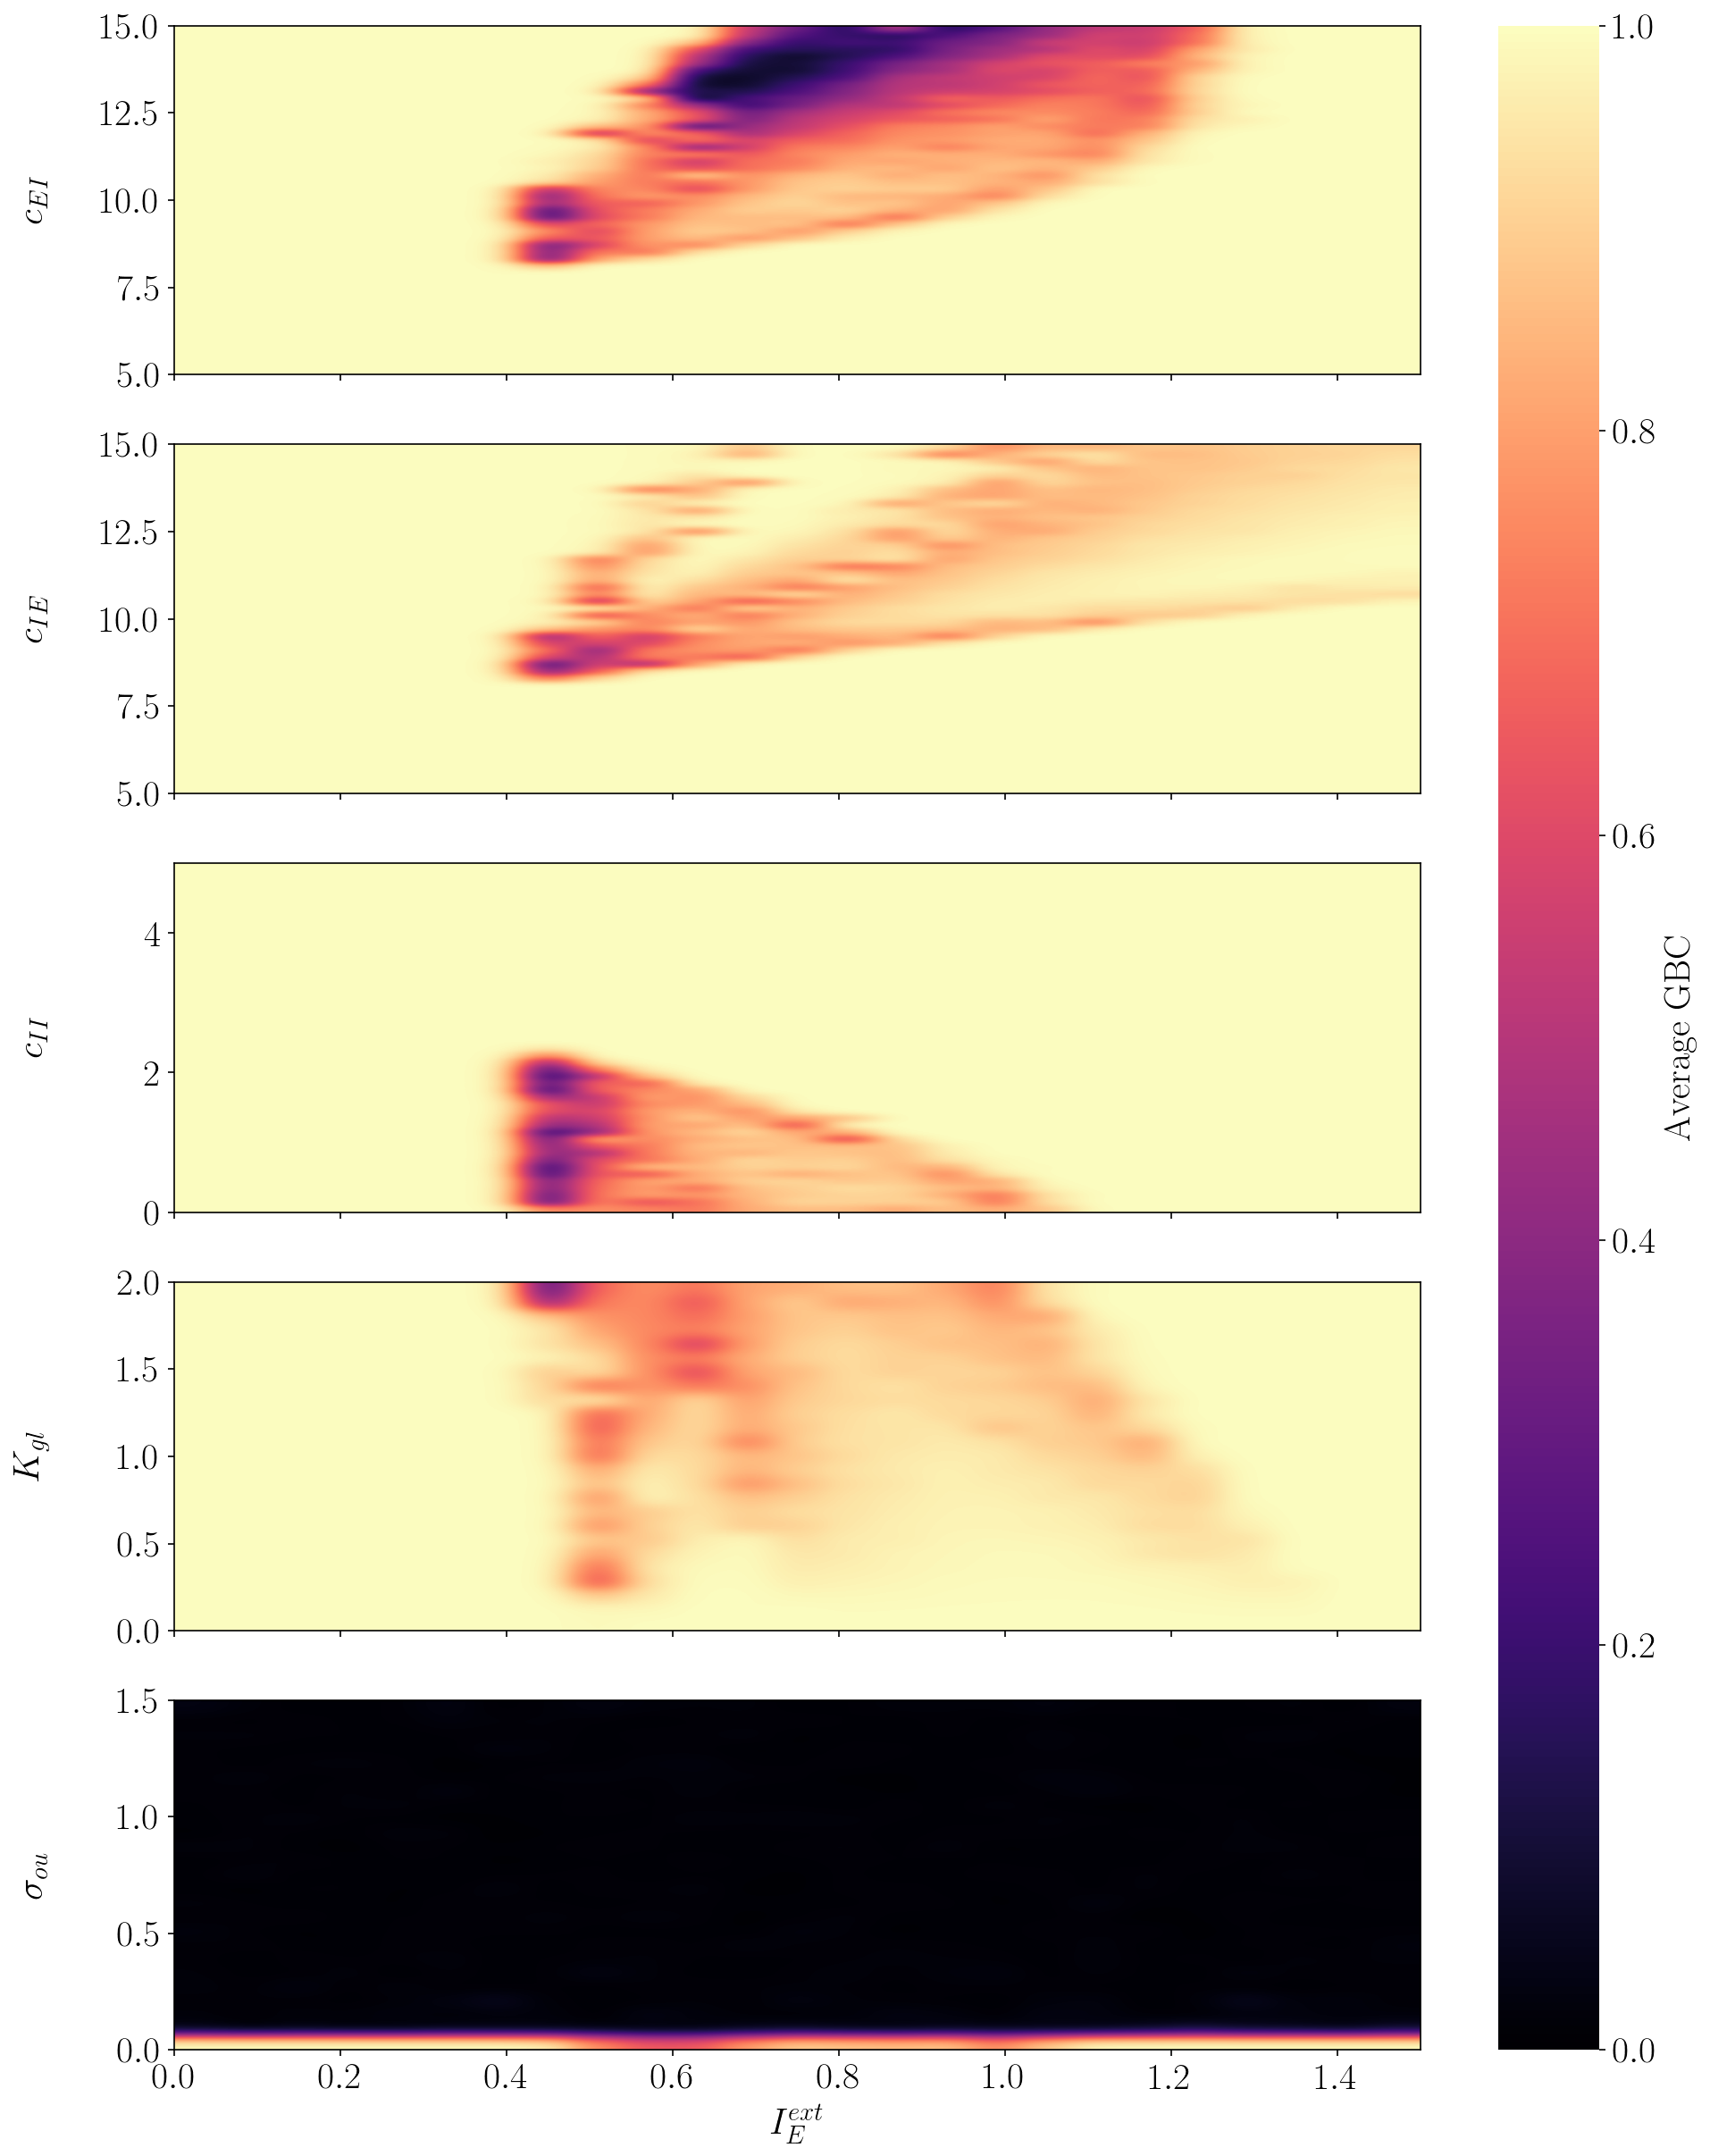

In [7]:
f, axarr = plt.subplots(5,1,figsize=(15, 20))
f.set_facecolor('w')

pivot_table_exc_ext_sigma_ou
img = axarr[0].imshow(pivot_table_exc_ext_cei,  vmin=0, vmax=1, aspect="auto", extent=[0,1.5,5,15], origin='lower', interpolation='gaussian')
#axarr[0].set_xlabel('exc_ext', size=20)
axarr[0].set_ylabel('$c_{EI}$', size=20)
axarr[0].set_xticklabels([' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '])

axarr[1].imshow(pivot_table_exc_ext_cie, vmin=0, vmax=1, aspect="auto", extent=[0,1.5,5,15], origin='lower',interpolation='gaussian')
#axarr[1].set_xlabel('exc_ext', size=20)
axarr[1].set_ylabel('$c_{IE}$', size=20)
axarr[1].set_xticklabels([' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '])

axarr[2].imshow(pivot_table_exc_ext_cii, vmin=0, vmax=1, aspect="auto", extent=[0,1.5,0,5], origin='lower',interpolation='gaussian')
#axarr[2].set_xlabel('exc_ext', size=20)
axarr[2].set_ylabel('$c_{II}$', size=20)
axarr[2].set_xticklabels([' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '])

axarr[3].imshow(pivot_table_exc_ext_kgl, vmin=0, vmax=1, aspect="auto", extent=[0,1.5,0,2], origin='lower',interpolation='gaussian')
#axarr[3].set_xlabel('exc_ext', size=20)
axarr[3].set_ylabel('$K_{gl}$', size=20)
axarr[3].set_xticklabels([' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '])

axarr[4].imshow(pivot_table_exc_ext_sigma_ou,  vmin=0, vmax=1, aspect="auto", extent=[0,1.5,0,1.5], origin='lower',interpolation='gaussian')
axarr[4].set_xlabel('$I^{ext}_{E}$', size=20)
axarr[4].set_ylabel('$\sigma_{ou}$', size=20)

axarr[0].get_yaxis().set_label_coords(-0.1,0.5)
axarr[1].get_yaxis().set_label_coords(-0.1,0.5)
axarr[2].get_yaxis().set_label_coords(-0.1,0.5)
axarr[3].get_yaxis().set_label_coords(-0.1,0.5)
axarr[4].get_yaxis().set_label_coords(-0.1,0.5)

#f.suptitle('Change in GBC based on parameters: exc_ext', x = 0.435, y = 0.9, size=18)
cbar = plt.colorbar(img, ax=axarr)
cbar.ax.set_ylabel('Average GBC', fontsize = 20)
cbar.outline.set_visible(False)
#plt.colorbar(img, ax= axarr, location="left")
#f.subplots_adjust(wspace=0.2)
#f.subplots_adjust(hspace=0.2)
f.align_ylabels(axarr[:])
f.savefig('exc_ext.png',bbox_inches='tight')

In [8]:
dataframe_cei_exc_ext = pd.DataFrame({'gbc_exc_ext_cei':gbc_exc_ext_cei,'ecei_exc_ext': ecei_exc_ext, 'ecei_cei': ecei_cei}) 
pivot_table_cei_exc_ext = dataframe_exc_ext_cei.pivot_table(values='gbc_exc_ext_cei', index = 'ecei_exc_ext', columns='ecei_cei')

dataframe_cei_cie = pd.DataFrame({'gbc_cei_cie':gbc_cei_cie,'ceicie_cei': ceicie_cei, 'ceicie_cie': ceicie_cie}) 
pivot_table_cei_cie = dataframe_cei_cie.pivot_table(values='gbc_cei_cie', index = 'ceicie_cie', columns='ceicie_cei')

dataframe_cei_cii = pd.DataFrame({'gbc_cei_cii':gbc_cei_cii,'ceicii_cei': ceicii_cei, 'ceicii_cii': ceicii_cii}) 
pivot_table_cei_cii = dataframe_cei_cii.pivot_table(values='gbc_cei_cii', index = 'ceicii_cii', columns='ceicii_cei')

dataframe_cei_kgl = pd.DataFrame({'gbc_cei_kgl':gbc_cei_kgl,'ceik_cei': ceik_cei, 'ceik_kgl': ceik_kgl}) 
pivot_table_cei_kgl = dataframe_cei_kgl.pivot_table(values='gbc_cei_kgl', index = 'ceik_kgl', columns='ceik_cei')

dataframe_cei_sigma_ou = pd.DataFrame({'gbc_cei_sigma_ou':gbc_cei_sigma_ou,'ceis_cei': ceis_cei, 'ceis_sigma_ou': ceis_sigma_ou}) 
pivot_table_cei_sigma_ou = dataframe_cei_sigma_ou.pivot_table(values='gbc_cei_sigma_ou', index = 'ceis_sigma_ou', columns='ceis_cei')

/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


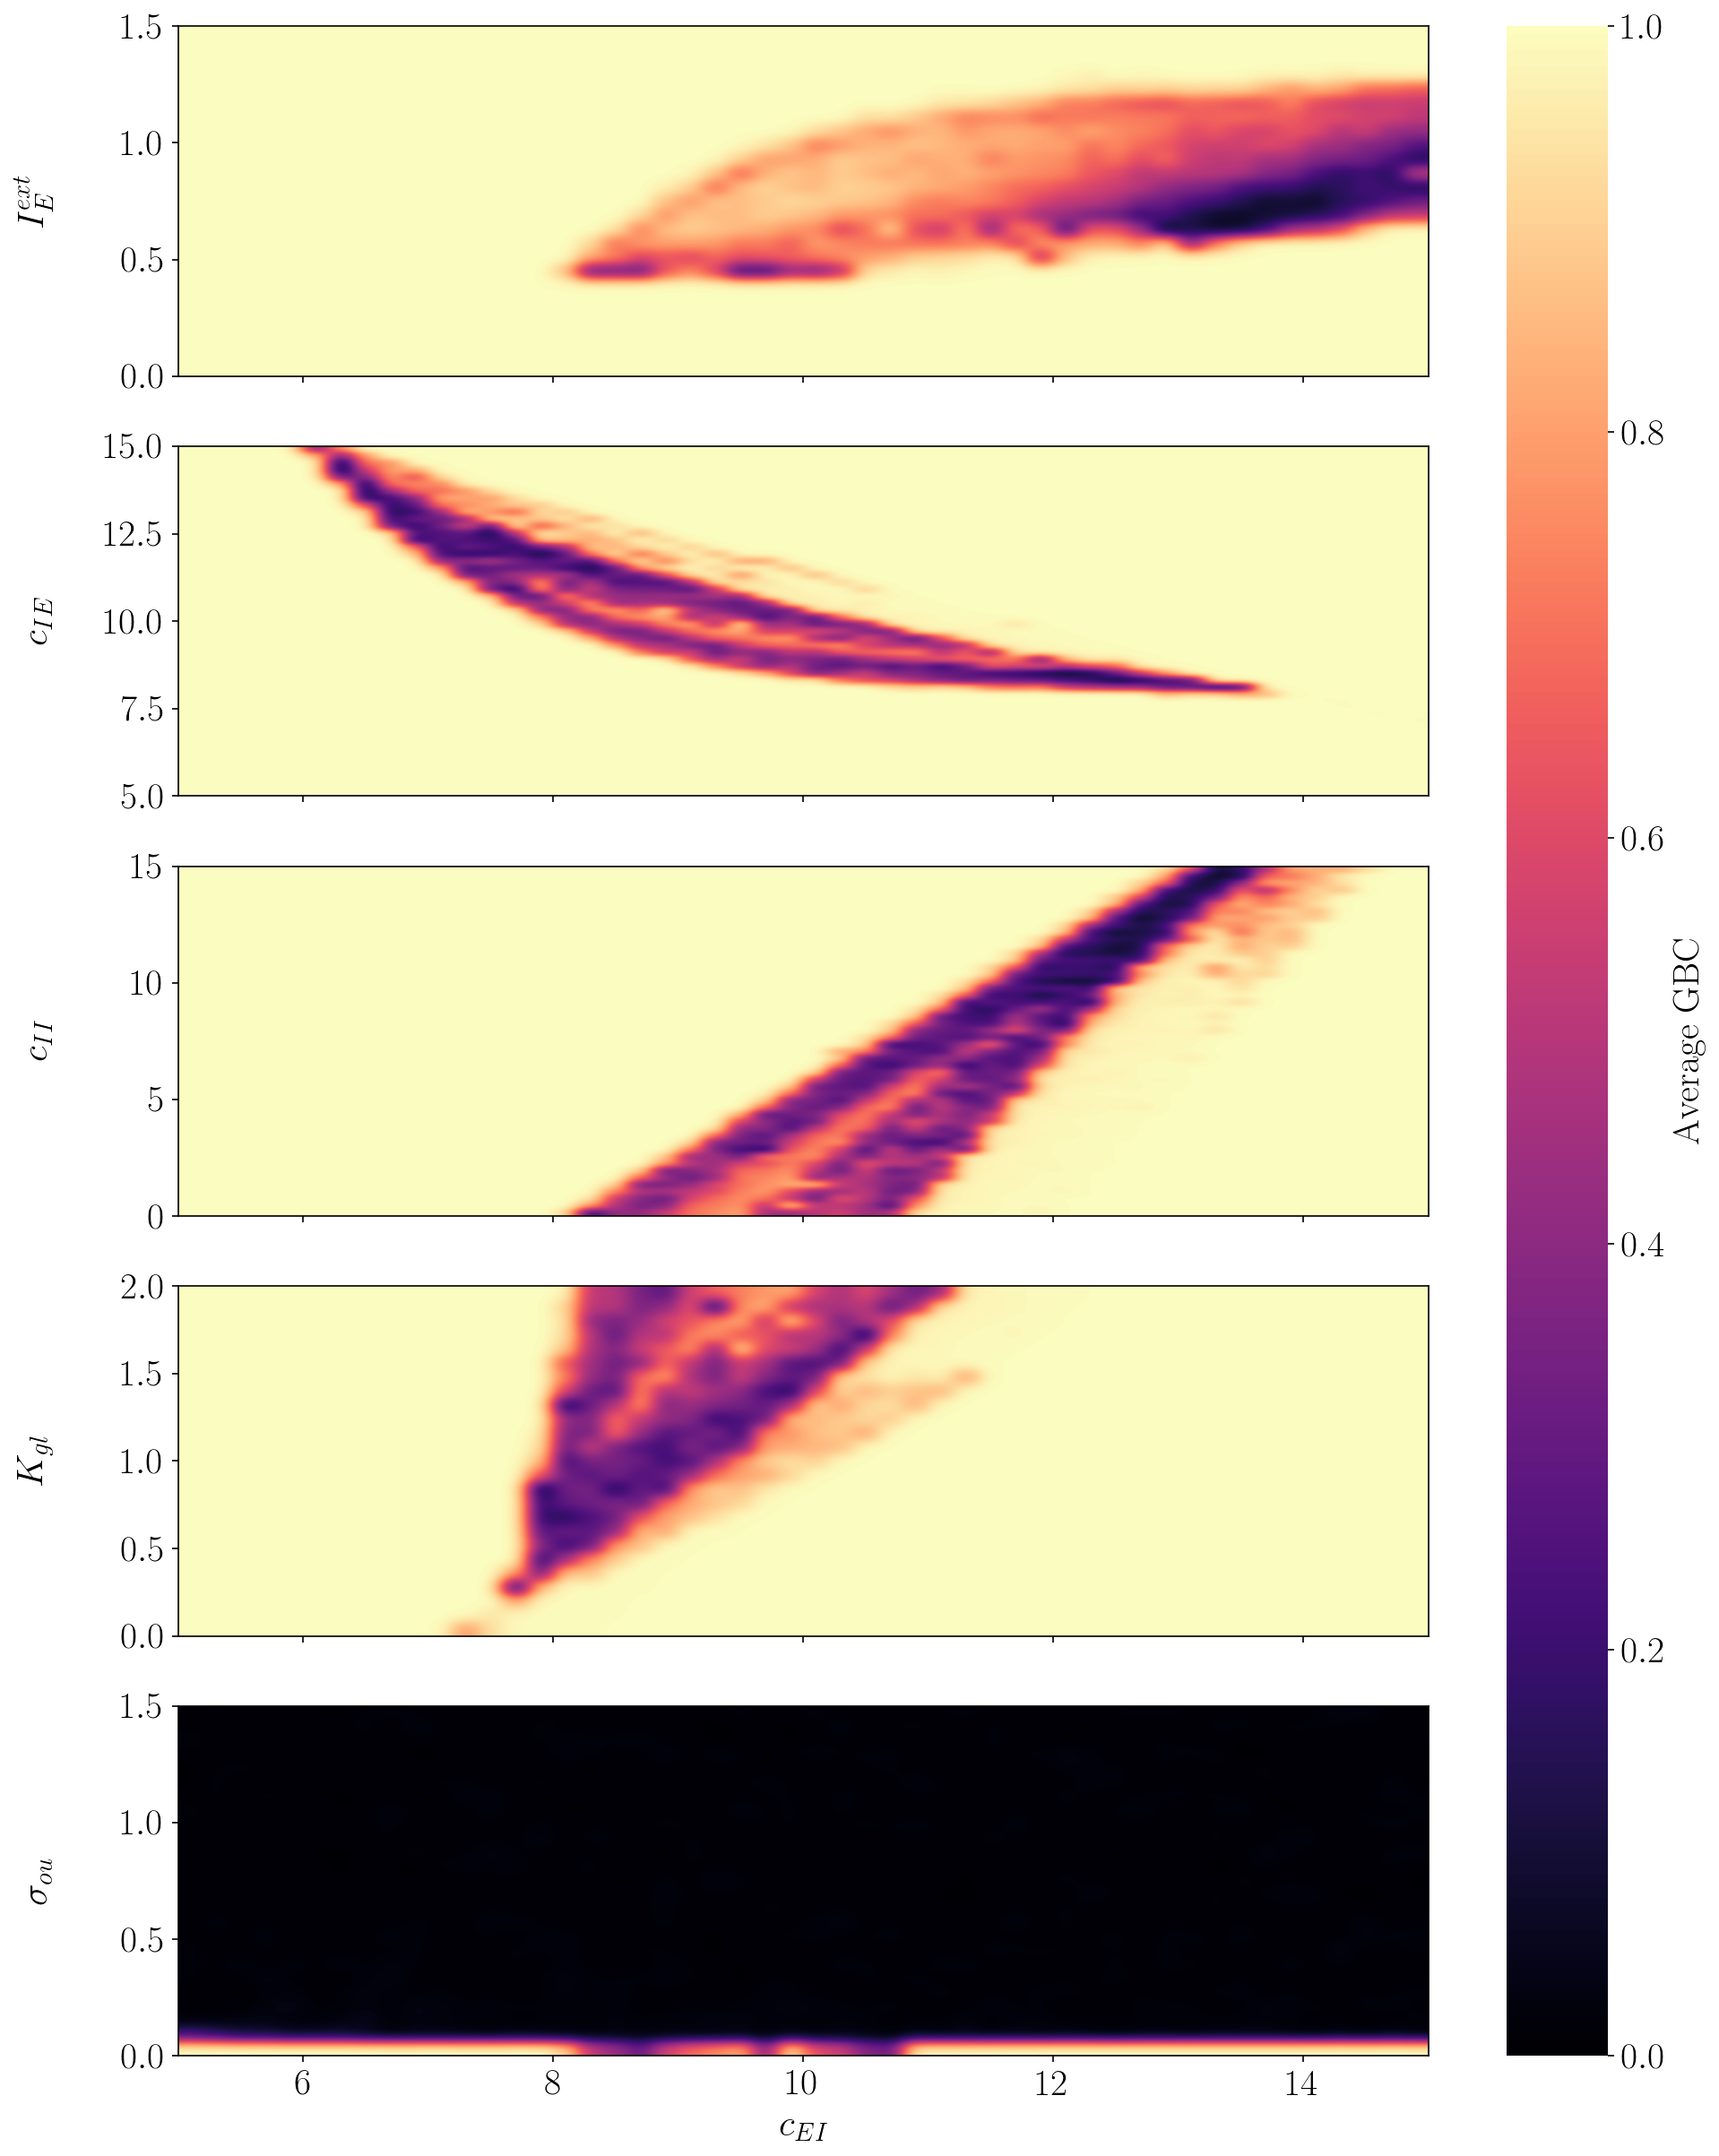

In [9]:
f, axarr = plt.subplots(5,1,figsize=(15, 20))
f.set_facecolor('w')

img = axarr[0].imshow(pivot_table_cei_exc_ext, vmin=0, vmax=1,aspect="auto", extent=[5,15,0,1.5], origin='lower',interpolation='gaussian')
#axarr[0].set_xlabel('c_exc_inh', size=20)
axarr[0].set_ylabel('$I^{ext}_{E}$', size=20)
axarr[0].set_xticklabels([' ', ' ',' ', ' ', ' '])

axarr[1].imshow(pivot_table_cei_cie, vmin=0, vmax=1,aspect="auto", extent=[5,15,5,15], origin='lower',interpolation='gaussian')
#axarr[1].set_xlabel('c_exc_inh', size=20)
axarr[1].set_ylabel('$c_{IE}$', size=20)
axarr[1].set_xticklabels([' ', ' ',' ', ' ', ' '])

axarr[2].imshow(pivot_table_cei_cii, vmin=0, vmax=1,aspect="auto", extent=[5,15,0,15], origin='lower',interpolation='gaussian')
#axarr[2].set_xlabel('c_exc_inh', size=20)
axarr[2].set_ylabel('$c_{II}$', size=20)
axarr[2].set_xticklabels([' ', ' ',' ', ' ', ' '])

axarr[3].imshow(pivot_table_cei_kgl,vmin=0, vmax=1, aspect="auto", extent=[5,15,0,2], origin='lower',interpolation='gaussian')
#axarr[3].set_xlabel('c_exc_inh',size=20)
axarr[3].set_ylabel('$K_{gl}$',size=20)
axarr[3].set_xticklabels([' ', ' ',' ', ' ', ' '])

axarr[4].imshow(pivot_table_cei_sigma_ou,vmin=0, vmax=1, aspect="auto", extent=[5,15,0,1.5], origin='lower',interpolation='gaussian')
axarr[4].set_xlabel('$c_{EI}$',size=20)
axarr[4].set_ylabel('$\sigma_{ou}$',size=20)

axarr[0].get_yaxis().set_label_coords(-0.1,0.5)
axarr[1].get_yaxis().set_label_coords(-0.1,0.5)
axarr[2].get_yaxis().set_label_coords(-0.1,0.5)
axarr[3].get_yaxis().set_label_coords(-0.1,0.5)
axarr[4].get_yaxis().set_label_coords(-0.1,0.5)

#f.suptitle('Change in GBC based on parameters: c_exc_inh', x = 0.435, y = 0.9, size=18)
cbar = plt.colorbar(img, ax=axarr)
cbar.ax.set_ylabel('Average GBC', fontsize = 20)
cbar.outline.set_visible(False)
f.align_ylabels(axarr[:])
f.savefig('c_excinh.png',bbox_inches='tight')

In [10]:
dataframe_exc_ext_cie = pd.DataFrame({'gbc_exc_ext_cie':gbc_exc_ext_cie,'ecie_exc_ext': ecie_exc_ext, 'ecie_cie': ecie_cie}) 
pivot_table_cie_exc_ext = dataframe_exc_ext_cie.pivot_table(values='gbc_exc_ext_cie', index = 'ecie_exc_ext', columns='ecie_cie')

dataframe_cei_cie = pd.DataFrame({'gbc_cei_cie':gbc_cei_cie,'ceicie_cei': ceicie_cei, 'ceicie_cie': ceicie_cie}) 
pivot_table_cie_cei = dataframe_cei_cie.pivot_table(values='gbc_cei_cie', index = 'ceicie_cei', columns='ceicie_cie')

dataframe_cie_cii = pd.DataFrame({'gbc_cie_cii':gbc_cie_cii,'ciecii_cie': ciecii_cei, 'ciecii_cii': ciecii_cii}) 
pivot_table_cie_cii = dataframe_cie_cii.pivot_table(values='gbc_cie_cii', index = 'ciecii_cii', columns='ciecii_cie')

dataframe_cie_kgl = pd.DataFrame({'gbc_cie_kgl':gbc_cie_kgl,'ciek_cie': ciek_cei, 'ciek_kgl': ciek_kgl}) 
pivot_table_cie_kgl = dataframe_cie_kgl.pivot_table(values='gbc_cie_kgl', index = 'ciek_kgl', columns='ciek_cie')

dataframe_cie_sigma_ou = pd.DataFrame({'gbc_cie_sigma_ou':gbc_cie_sigma_ou,'cies_cie': cies_cie, 'cies_sigma_ou': cies_sigma_ou}) 
pivot_table_cie_sigma_ou = dataframe_cie_sigma_ou.pivot_table(values='gbc_cie_sigma_ou', index = 'cies_sigma_ou', columns='cies_cie')

/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


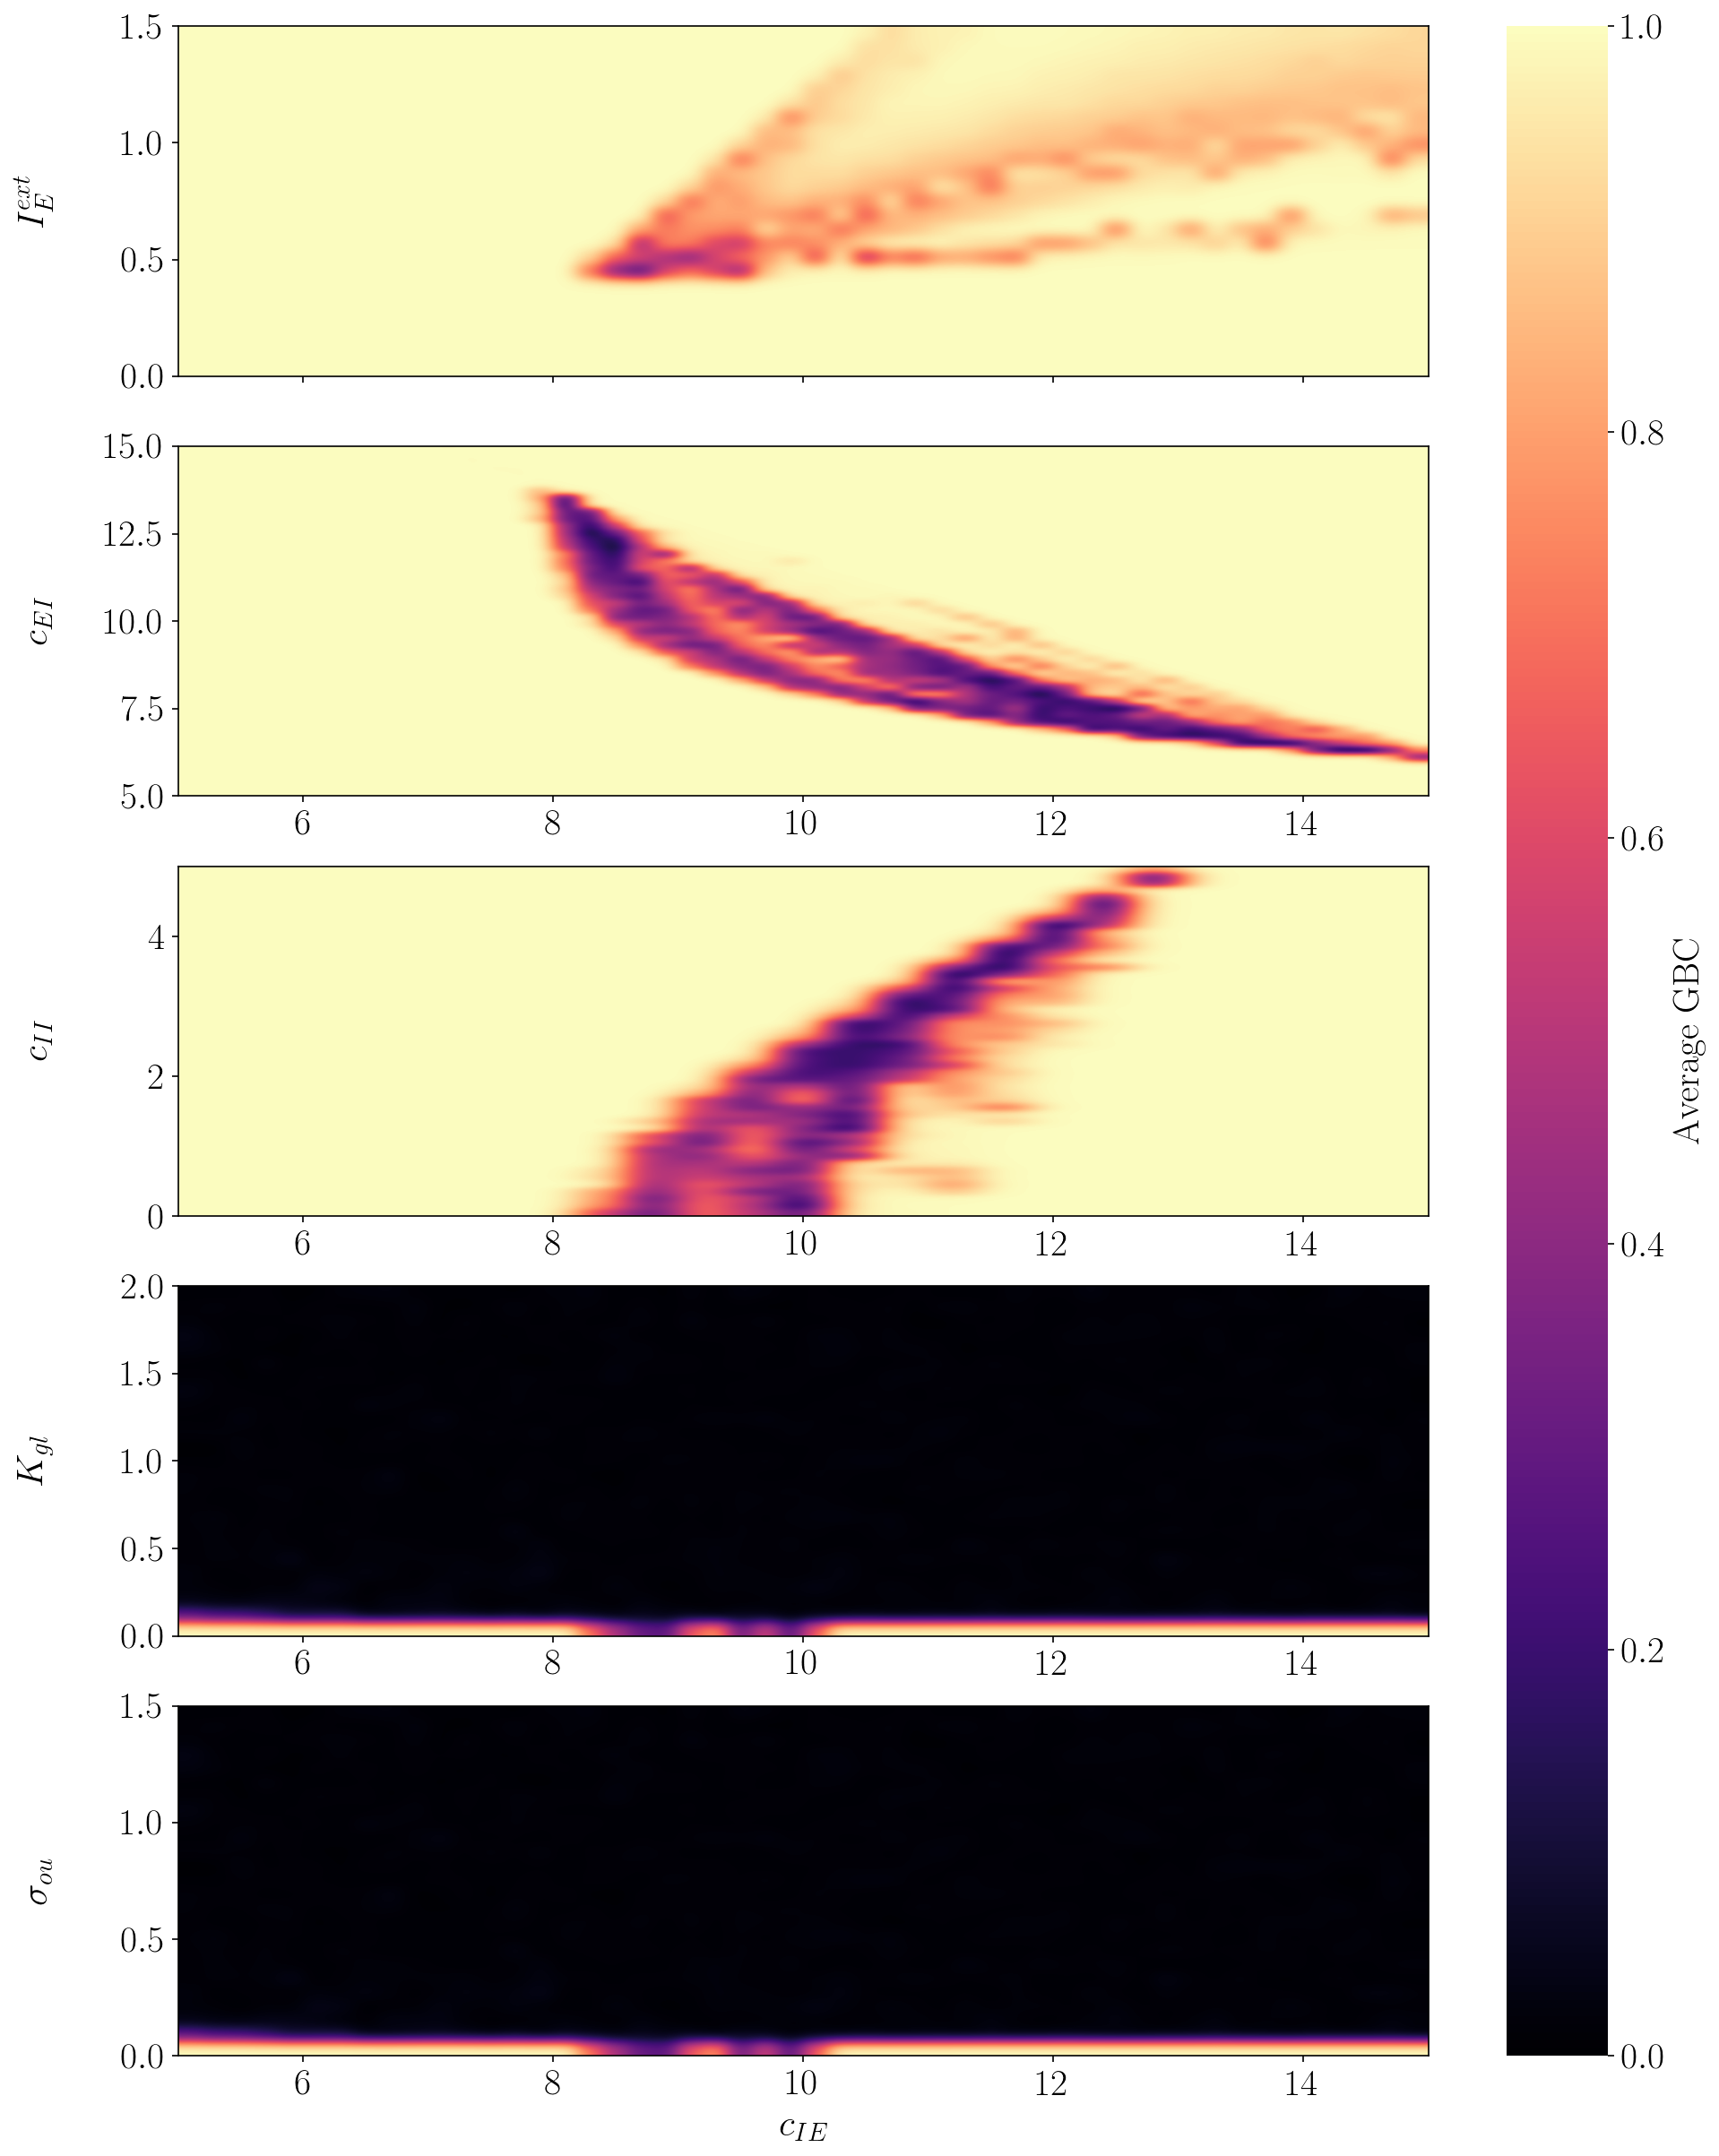

In [11]:
f, axarr = plt.subplots(5,1,figsize=(15, 20))
f.set_facecolor('w')

img = axarr[0].imshow(pivot_table_cie_exc_ext, vmin=0, vmax=1,aspect="auto", extent=[5,15,0,1.5], origin='lower',interpolation='gaussian')
#axarr[0].set_xlabel('c_inh_exc',size=20)
axarr[0].set_ylabel('$I^{ext}_{E}$',size=20)
axarr[0].set_xticklabels([' ', ' ',' ', ' ', ' '])

axarr[1].imshow(pivot_table_cie_cei,vmin=0, vmax=1, aspect="auto", extent=[5,15,5,15], origin='lower',interpolation='gaussian')
#axarr[1].set_xlabel('c_inh_exc',size=20)
axarr[1].set_ylabel('$c_{EI}$',size=20)
axarr[0].set_xticklabels([' ', ' ',' ', ' ', ' '])

axarr[2].imshow(pivot_table_cie_cii, vmin=0, vmax=1,aspect="auto", extent=[5,15,0,5], origin='lower',interpolation='gaussian')
#axarr[2].set_xlabel('c_inh_exc',size=20)
axarr[2].set_ylabel('$c_{II}$',size=20)
axarr[0].set_xticklabels([' ', ' ',' ', ' ', ' '])

axarr[3].imshow(pivot_table_cie_kgl,vmin=0, vmax=1, aspect="auto", extent=[5,15,0,2], origin='lower',interpolation='gaussian')
#axarr[3].set_xlabel('c_inh_exc',size=20)
axarr[3].set_ylabel('$K_{gl}$',size=20)
axarr[0].set_xticklabels([' ', ' ',' ', ' ', ' '])

axarr[4].imshow(pivot_table_cie_sigma_ou,vmin=0, vmax=1, aspect="auto", extent=[5,15,0,1.5], origin='lower',interpolation='gaussian')
axarr[4].set_xlabel('$c_{IE}$',size=20)
axarr[4].set_ylabel('$\sigma_{ou}$',size=20)

axarr[0].get_yaxis().set_label_coords(-0.1,0.5)
axarr[1].get_yaxis().set_label_coords(-0.1,0.5)
axarr[2].get_yaxis().set_label_coords(-0.1,0.5)
axarr[3].get_yaxis().set_label_coords(-0.1,0.5)
axarr[4].get_yaxis().set_label_coords(-0.1,0.5)

#f.suptitle('Change in GBC based on parameters: c_inh_exc', x = 0.435, y = 0.9, size=18)
cbar = plt.colorbar(img, ax=axarr)
cbar.ax.set_ylabel('Average GBC', fontsize = 20)
cbar.outline.set_visible(False)

f.align_ylabels(axarr[:])
f.savefig('c_inhexc.png',bbox_inches='tight')

In [12]:
dataframe_cie_cii = pd.DataFrame({'gbc_cie_cii':gbc_cie_cii,'ciecii_cie': ciecii_cei, 'ciecii_cii': ciecii_cii}) 
pivot_table_cii_cie = dataframe_cie_cii.pivot_table(values='gbc_cie_cii', index = 'ciecii_cie', columns='ciecii_cii')

dataframe_cei_cii = pd.DataFrame({'gbc_cei_cii':gbc_cei_cii,'ceicii_cei': ceicii_cei, 'ceicii_cii': ceicii_cii}) 
pivot_table_cii_cei = dataframe_cei_cii.pivot_table(values='gbc_cei_cii', index = 'ceicii_cei', columns='ceicii_cii')

dataframe_exc_ext_cii = pd.DataFrame({'gbc_exc_ext_cii':gbc_exc_ext_cii,'ecii_exc_ext': ecii_exc_ext, 'ecii_cii': ecii_cii}) 
pivot_table_cii_exc_ext = dataframe_exc_ext_cii.pivot_table(values='gbc_exc_ext_cii', index = 'ecii_exc_ext', columns='ecii_cii')

dataframe_cii_kgl = pd.DataFrame({'gbc_cii_kgl':gbc_cii_kgl,'ciik_cii': ciik_cii, 'ciik_kgl': ciik_kgl}) 
pivot_table_cii_kgl = dataframe_cii_kgl.pivot_table(values='gbc_cii_kgl', index = 'ciik_kgl', columns='ciik_cii')

dataframe_cii_sigma_ou = pd.DataFrame({'gbc_cii_sigma_ou':gbc_cii_sigma_ou,'ciis_cii': ciis_cii, 'ciis_sigma_ou': ciis_sigma_ou}) 
pivot_table_cii_sigma_ou = dataframe_cii_sigma_ou.pivot_table(values='gbc_cii_sigma_ou', index = 'ciis_sigma_ou', columns='ciis_cii')

/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


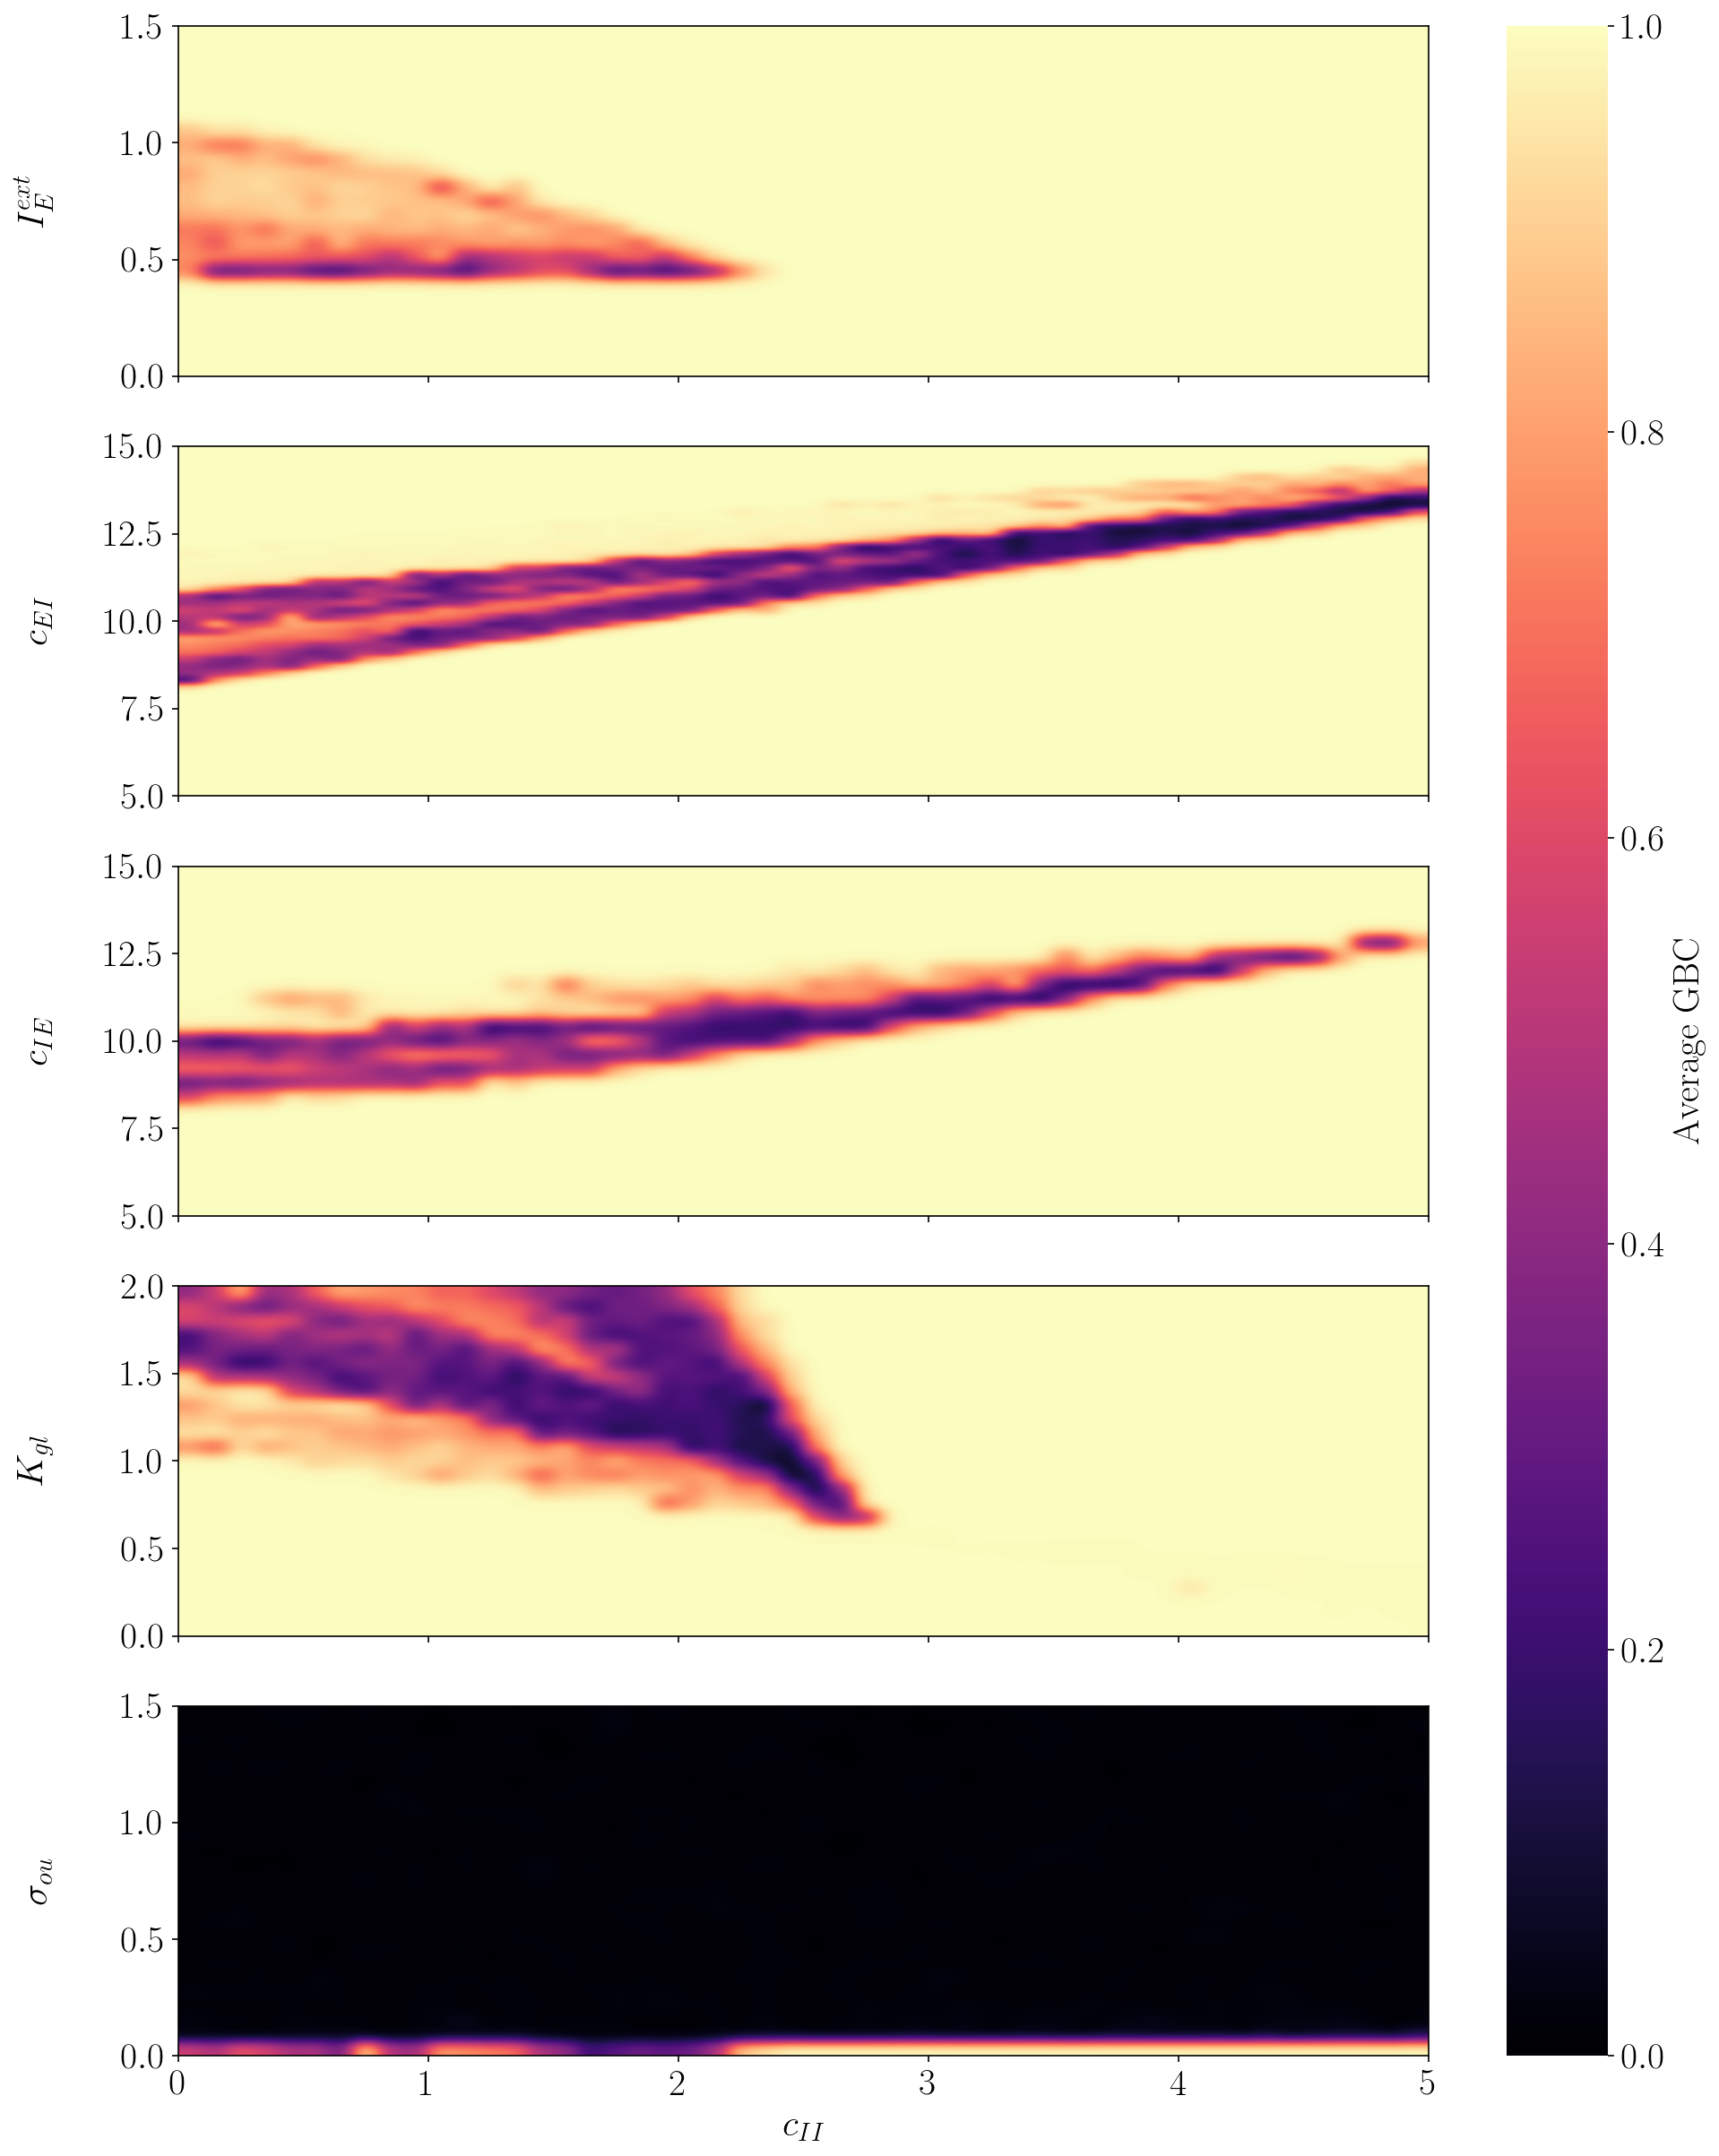

In [13]:
f, axarr = plt.subplots(5,1,figsize=(15, 20))
f.set_facecolor('w')

img = axarr[0].imshow(pivot_table_cii_exc_ext, vmin=0, vmax=1,aspect="auto", extent=[0,5,0,1.5], origin='lower',interpolation='gaussian')
#axarr[0].set_xlabel('c_inh_inh',size=20)
axarr[0].set_ylabel('$I^{ext}_{E}$',size=20)
axarr[0].set_xticklabels([' ', ' ',' ', ' ', ' ', ' '])

axarr[1].imshow(pivot_table_cii_cei, vmin=0, vmax=1,aspect="auto", extent=[0,5,5,15], origin='lower',interpolation='gaussian')
#axarr[1].set_xlabel('c_inh_inh',size=20)
axarr[1].set_ylabel('$c_{EI}$',size=20)
axarr[1].set_xticklabels([' ', ' ',' ', ' ', ' ', ' '])

axarr[2].imshow(pivot_table_cii_cie,vmin=0, vmax=1, aspect="auto", extent=[0,5,5,15], origin='lower',interpolation='gaussian')
#axarr[2].set_xlabel('c_inh_inh',size=20)
axarr[2].set_ylabel('$c_{IE}$',size=20)
axarr[2].set_xticklabels([' ', ' ',' ', ' ', ' ', ' '])

axarr[3].imshow(pivot_table_cii_kgl, vmin=0, vmax=1,aspect="auto", extent=[0,5,0,2], origin='lower',interpolation='gaussian')
#axarr[3].set_xlabel('c_inh_inh',size=20)
axarr[3].set_ylabel('$K_{gl}$',size=20)
axarr[3].set_xticklabels([' ', ' ',' ', ' ', ' ', ' '])

axarr[4].imshow(pivot_table_cii_sigma_ou,vmin=0, vmax=1, aspect="auto", extent=[0,5,0,1.5], origin='lower',interpolation='gaussian')
axarr[4].set_xlabel('$c_{II}$',size=20)
axarr[4].set_ylabel('$\sigma_{ou}$',size=20)

axarr[0].get_yaxis().set_label_coords(-0.1,0.5)
axarr[1].get_yaxis().set_label_coords(-0.1,0.5)
axarr[2].get_yaxis().set_label_coords(-0.1,0.5)
axarr[3].get_yaxis().set_label_coords(-0.1,0.5)
axarr[4].get_yaxis().set_label_coords(-0.1,0.5)

f.align_ylabels(axarr[:])
#f.suptitle('Change in GBC based on parameters: c_inh_inh', x = 0.435, y = 0.9, size=18)
cbar = plt.colorbar(img, ax=axarr)
cbar.ax.set_ylabel('Average GBC', fontsize = 20)
cbar.outline.set_visible(False)
f.savefig('c_inhinh.png', bbox_inches='tight')

In [14]:
dataframe_exc_ext_kgl = pd.DataFrame({'gbc_exc_ext_kgl':gbc_exc_ext_kgl,'ekgl_exc_ext': ekgl_exc_ext, 'ekgl_kgl': ekgl_kgl}) 
pivot_table_kgl_exc_ext = dataframe_exc_ext_kgl.pivot_table(values='gbc_exc_ext_kgl', index = 'ekgl_exc_ext', columns='ekgl_kgl')

dataframe_cei_kgl = pd.DataFrame({'gbc_cei_kgl':gbc_cei_kgl,'ceik_cei': ceik_cei, 'ceik_kgl': ceik_kgl}) 
pivot_table_kgl_cei = dataframe_cei_kgl.pivot_table(values='gbc_cei_kgl', index = 'ceik_cei', columns='ceik_kgl')


dataframe_cie_kgl = pd.DataFrame({'gbc_cie_kgl':gbc_cie_kgl,'ciek_cie': ciek_cei, 'ciek_kgl': ciek_kgl}) 
pivot_table_kgl_cie = dataframe_cie_kgl.pivot_table(values='gbc_cie_kgl', index = 'ciek_cie', columns='ciek_kgl')


dataframe_cii_kgl = pd.DataFrame({'gbc_cii_kgl':gbc_cii_kgl,'ciik_cii': ciik_cii, 'ciik_kgl': ciik_kgl}) 
pivot_table_kgl_cii = dataframe_cii_kgl.pivot_table(values='gbc_cii_kgl', index = 'ciik_cii', columns='ciik_kgl')


dataframe_kgl_sigma_ou = pd.DataFrame({'gbc_kgl_sigma_ou':gbc_kgl_sigma_ou,'ks_kgl': ks_kgl, 'ks_sigma_ou': ks_sigma_ou}) 
pivot_table_kgl_sigma_ou = dataframe_kgl_sigma_ou.pivot_table(values='gbc_kgl_sigma_ou', index = 'ks_sigma_ou', columns='ks_kgl')


/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


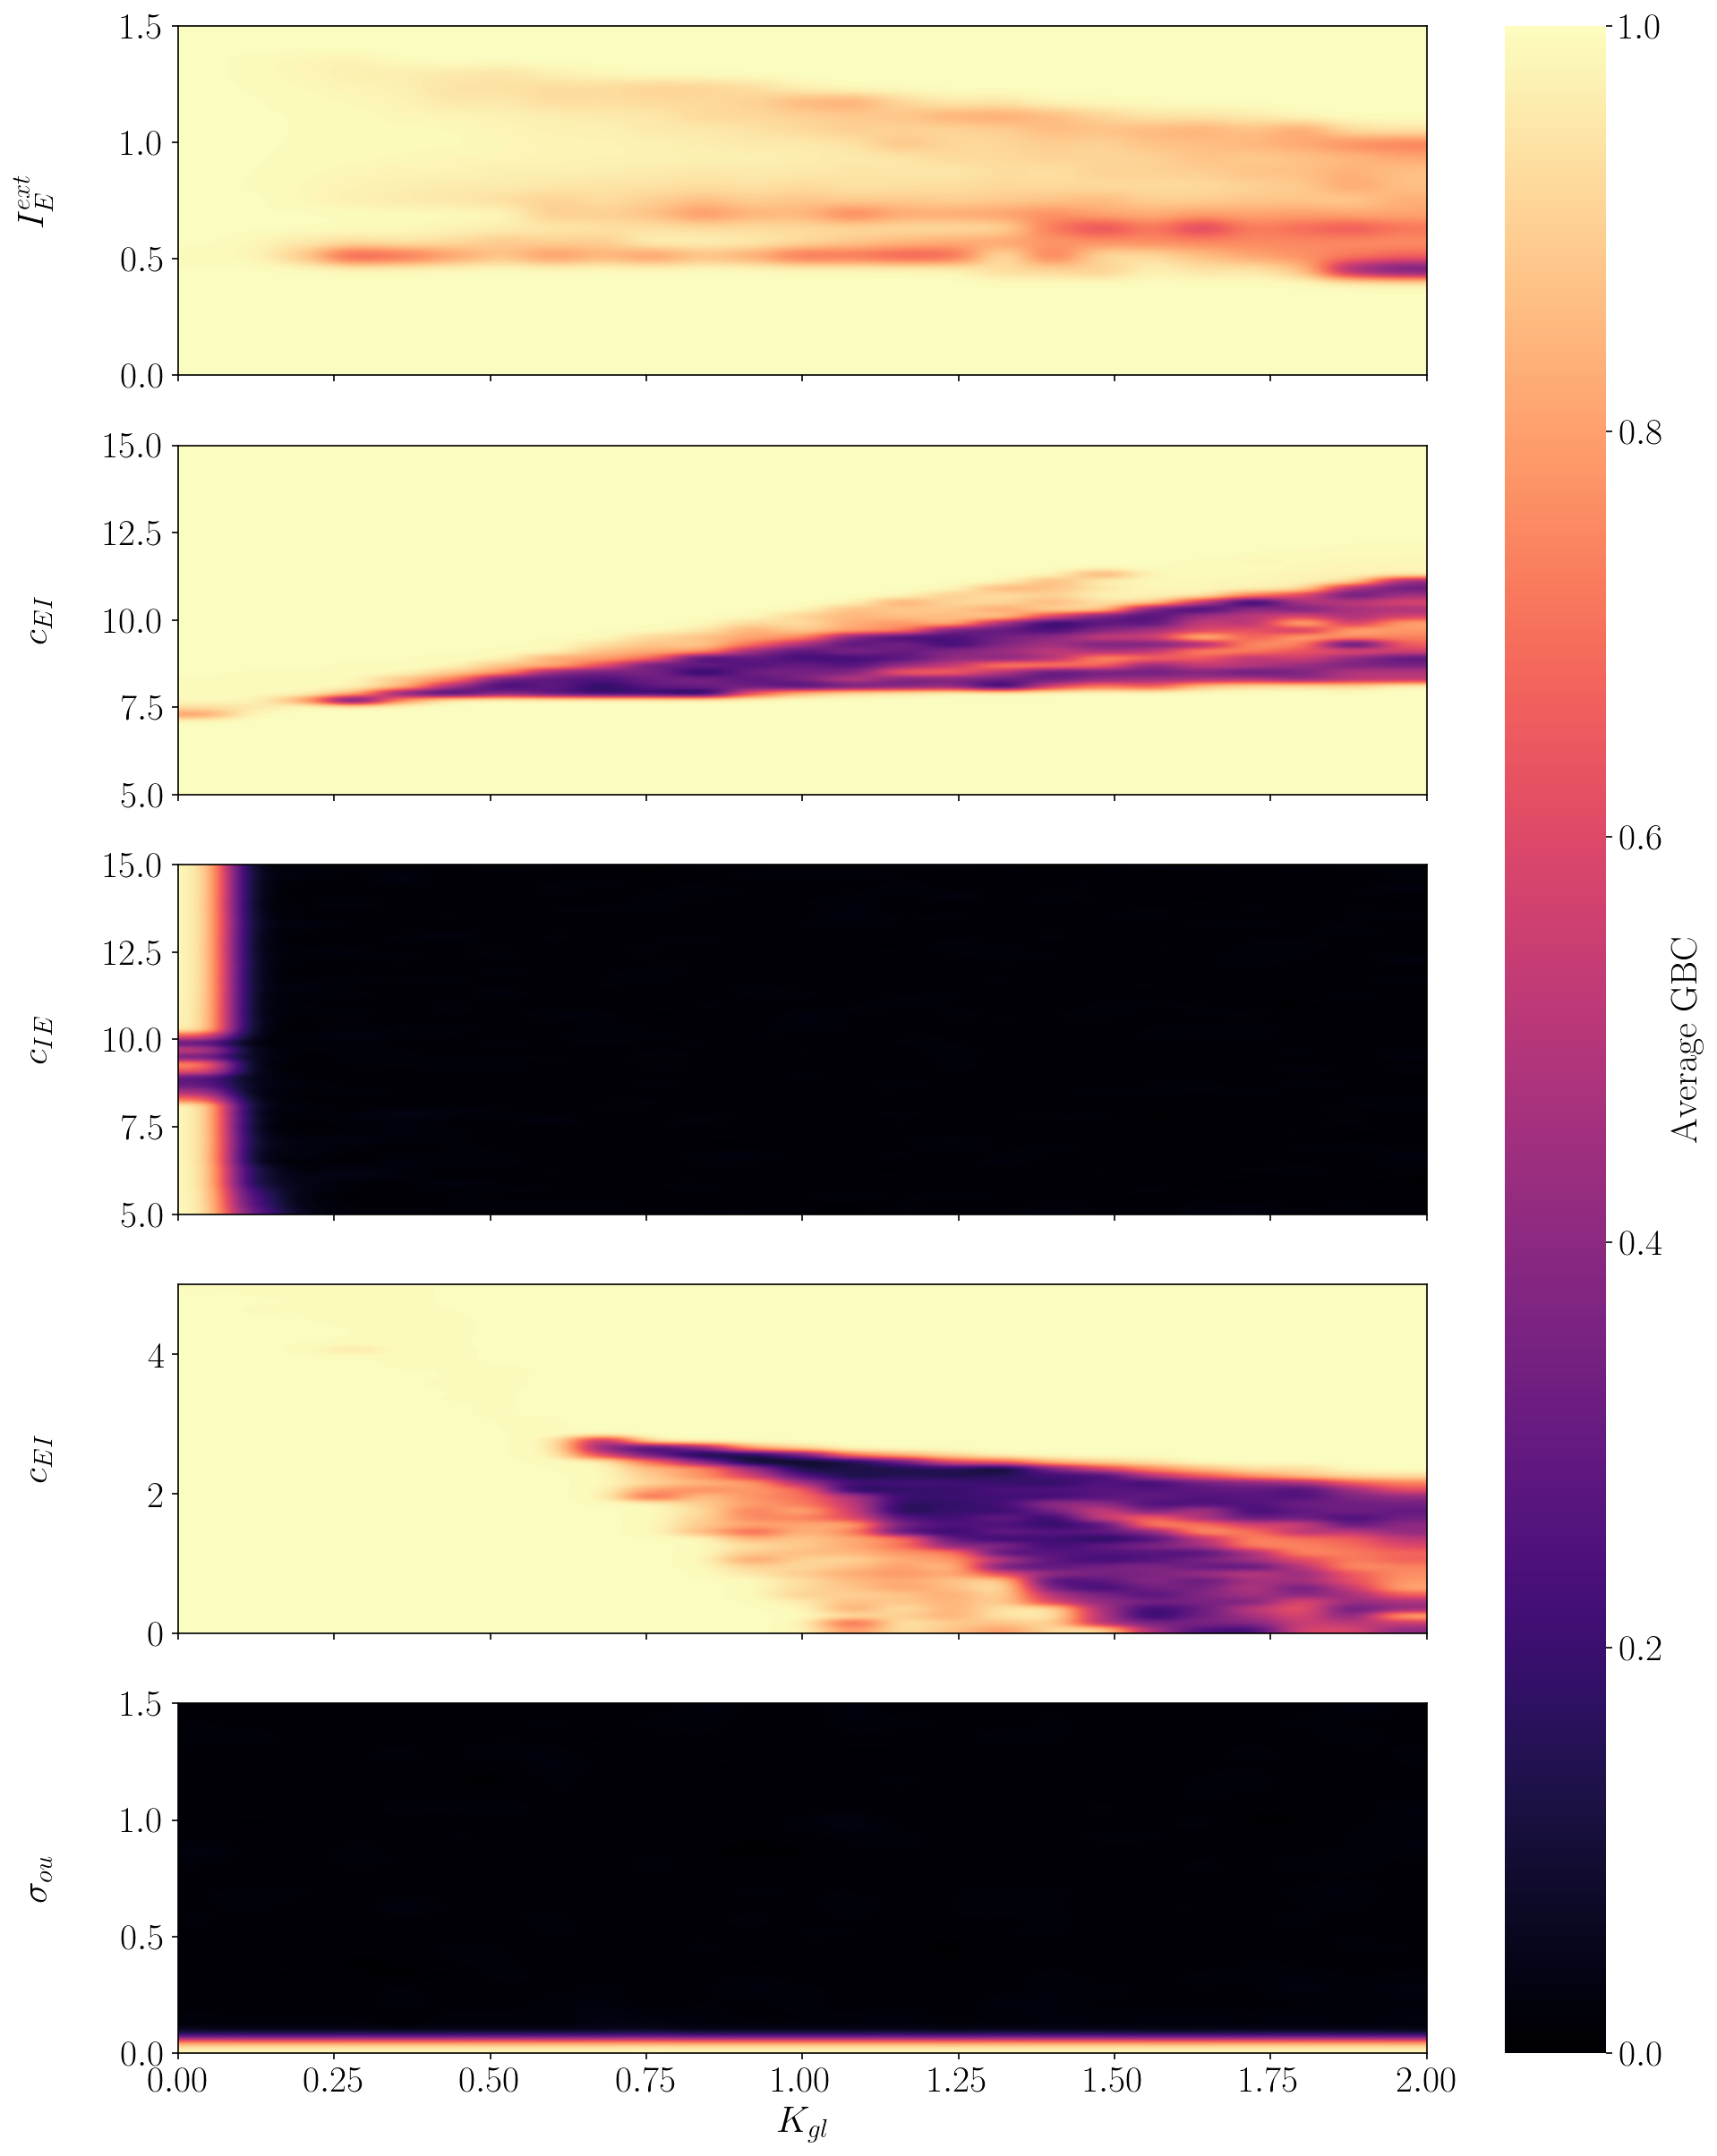

In [15]:
f, axarr = plt.subplots(5,1,figsize=(15, 20))
f.set_facecolor('w')

img = axarr[0].imshow(pivot_table_kgl_exc_ext, vmin=0, vmax=1,aspect="auto", extent=[0,2,0,1.5], origin='lower',interpolation='gaussian')
#axarr[0].set_xlabel('K_gl',size=20)
axarr[0].set_ylabel('$I^{ext}_{E}$',size=20)
axarr[0].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])

axarr[1].imshow(pivot_table_kgl_cei, vmin=0, vmax=1,aspect="auto", extent=[0,2,5,15], origin='lower',interpolation='gaussian')
#axarr[1].set_xlabel('K_gl',size=20)
axarr[1].set_ylabel('$c_{EI}$',size=20)
axarr[1].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])

axarr[2].imshow(pivot_table_kgl_cie, vmin=0, vmax=1,aspect="auto", extent=[0,2,5,15], origin='lower',interpolation='gaussian')
#axarr[2].set_xlabel('K_gl',size=20)
axarr[2].set_ylabel('$c_{IE}$',size=20)
axarr[2].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])

axarr[3].imshow(pivot_table_kgl_cii, vmin=0, vmax=1,aspect="auto", extent=[0,2,0,5], origin='lower',interpolation='gaussian')
#axarr[3].set_xlabel('K_gl',size=20)
axarr[3].set_ylabel('$c_{EI}$',size=20)
axarr[3].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])

axarr[4].imshow(pivot_table_kgl_sigma_ou, vmin=0, vmax=1,aspect="auto", extent=[0,2,0,1.5], origin='lower',interpolation='gaussian')
axarr[4].set_xlabel('$K_{gl}$',size=20)
axarr[4].set_ylabel('$\sigma_{ou}$',size=20)

axarr[0].get_yaxis().set_label_coords(-0.1,0.5)
axarr[1].get_yaxis().set_label_coords(-0.1,0.5)
axarr[2].get_yaxis().set_label_coords(-0.1,0.5)
axarr[3].get_yaxis().set_label_coords(-0.1,0.5)
axarr[4].get_yaxis().set_label_coords(-0.1,0.5)

#f.suptitle('Change in GBC based on parameters: K_gl', x = 0.435, y = 0.9, size=18)
cbar = plt.colorbar(img, ax=axarr)
cbar.ax.set_ylabel('Average GBC', fontsize = 20)
cbar.outline.set_visible(False)
f.align_ylabels(axarr[:])
f.savefig('k_gl.png', bbox_inches='tight')

In [16]:
dataframe_exc_ext_sigma_ou = pd.DataFrame({'gbc_exc_ext_sigma_ou':gbc_exc_ext_sigma_ou,'es_exc_ext': es_exc_ext, 'es_sigma_ou': es_sigma_ou}) 
pivot_table_sigma_ou_exc_ext = dataframe_exc_ext_sigma_ou.pivot_table(values='gbc_exc_ext_sigma_ou', index = 'es_exc_ext', columns='es_sigma_ou')

dataframe_cei_sigma_ou = pd.DataFrame({'gbc_cei_sigma_ou':gbc_cei_sigma_ou,'ceis_cei': ceis_cei, 'ceis_sigma_ou': ceis_sigma_ou}) 
pivot_table_sigma_ou_cei = dataframe_cei_sigma_ou.pivot_table(values='gbc_cei_sigma_ou', index = 'ceis_cei', columns='ceis_sigma_ou')

dataframe_cie_sigma_ou = pd.DataFrame({'gbc_cie_sigma_ou':gbc_cie_sigma_ou,'cies_cie': cies_cie, 'cies_sigma_ou': cies_sigma_ou}) 
pivot_table_sigma_ou_cie = dataframe_cie_sigma_ou.pivot_table(values='gbc_cie_sigma_ou', index = 'cies_cie', columns='cies_sigma_ou')

dataframe_cii_sigma_ou = pd.DataFrame({'gbc_cii_sigma_ou':gbc_cii_sigma_ou,'ciis_cii': ciis_cii, 'ciis_sigma_ou': ciis_sigma_ou}) 
pivot_table_sigma_ou_cii = dataframe_cii_sigma_ou.pivot_table(values='gbc_cii_sigma_ou', index = 'ciis_cii', columns='ciis_sigma_ou')

dataframe_kgl_sigma_ou = pd.DataFrame({'gbc_kgl_sigma_ou':gbc_kgl_sigma_ou,'ks_kgl': ks_kgl, 'ks_sigma_ou': ks_sigma_ou}) 
pivot_table_sigma_ou_kgl = dataframe_kgl_sigma_ou.pivot_table(values='gbc_kgl_sigma_ou', index = 'ks_kgl', columns='ks_sigma_ou')


/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


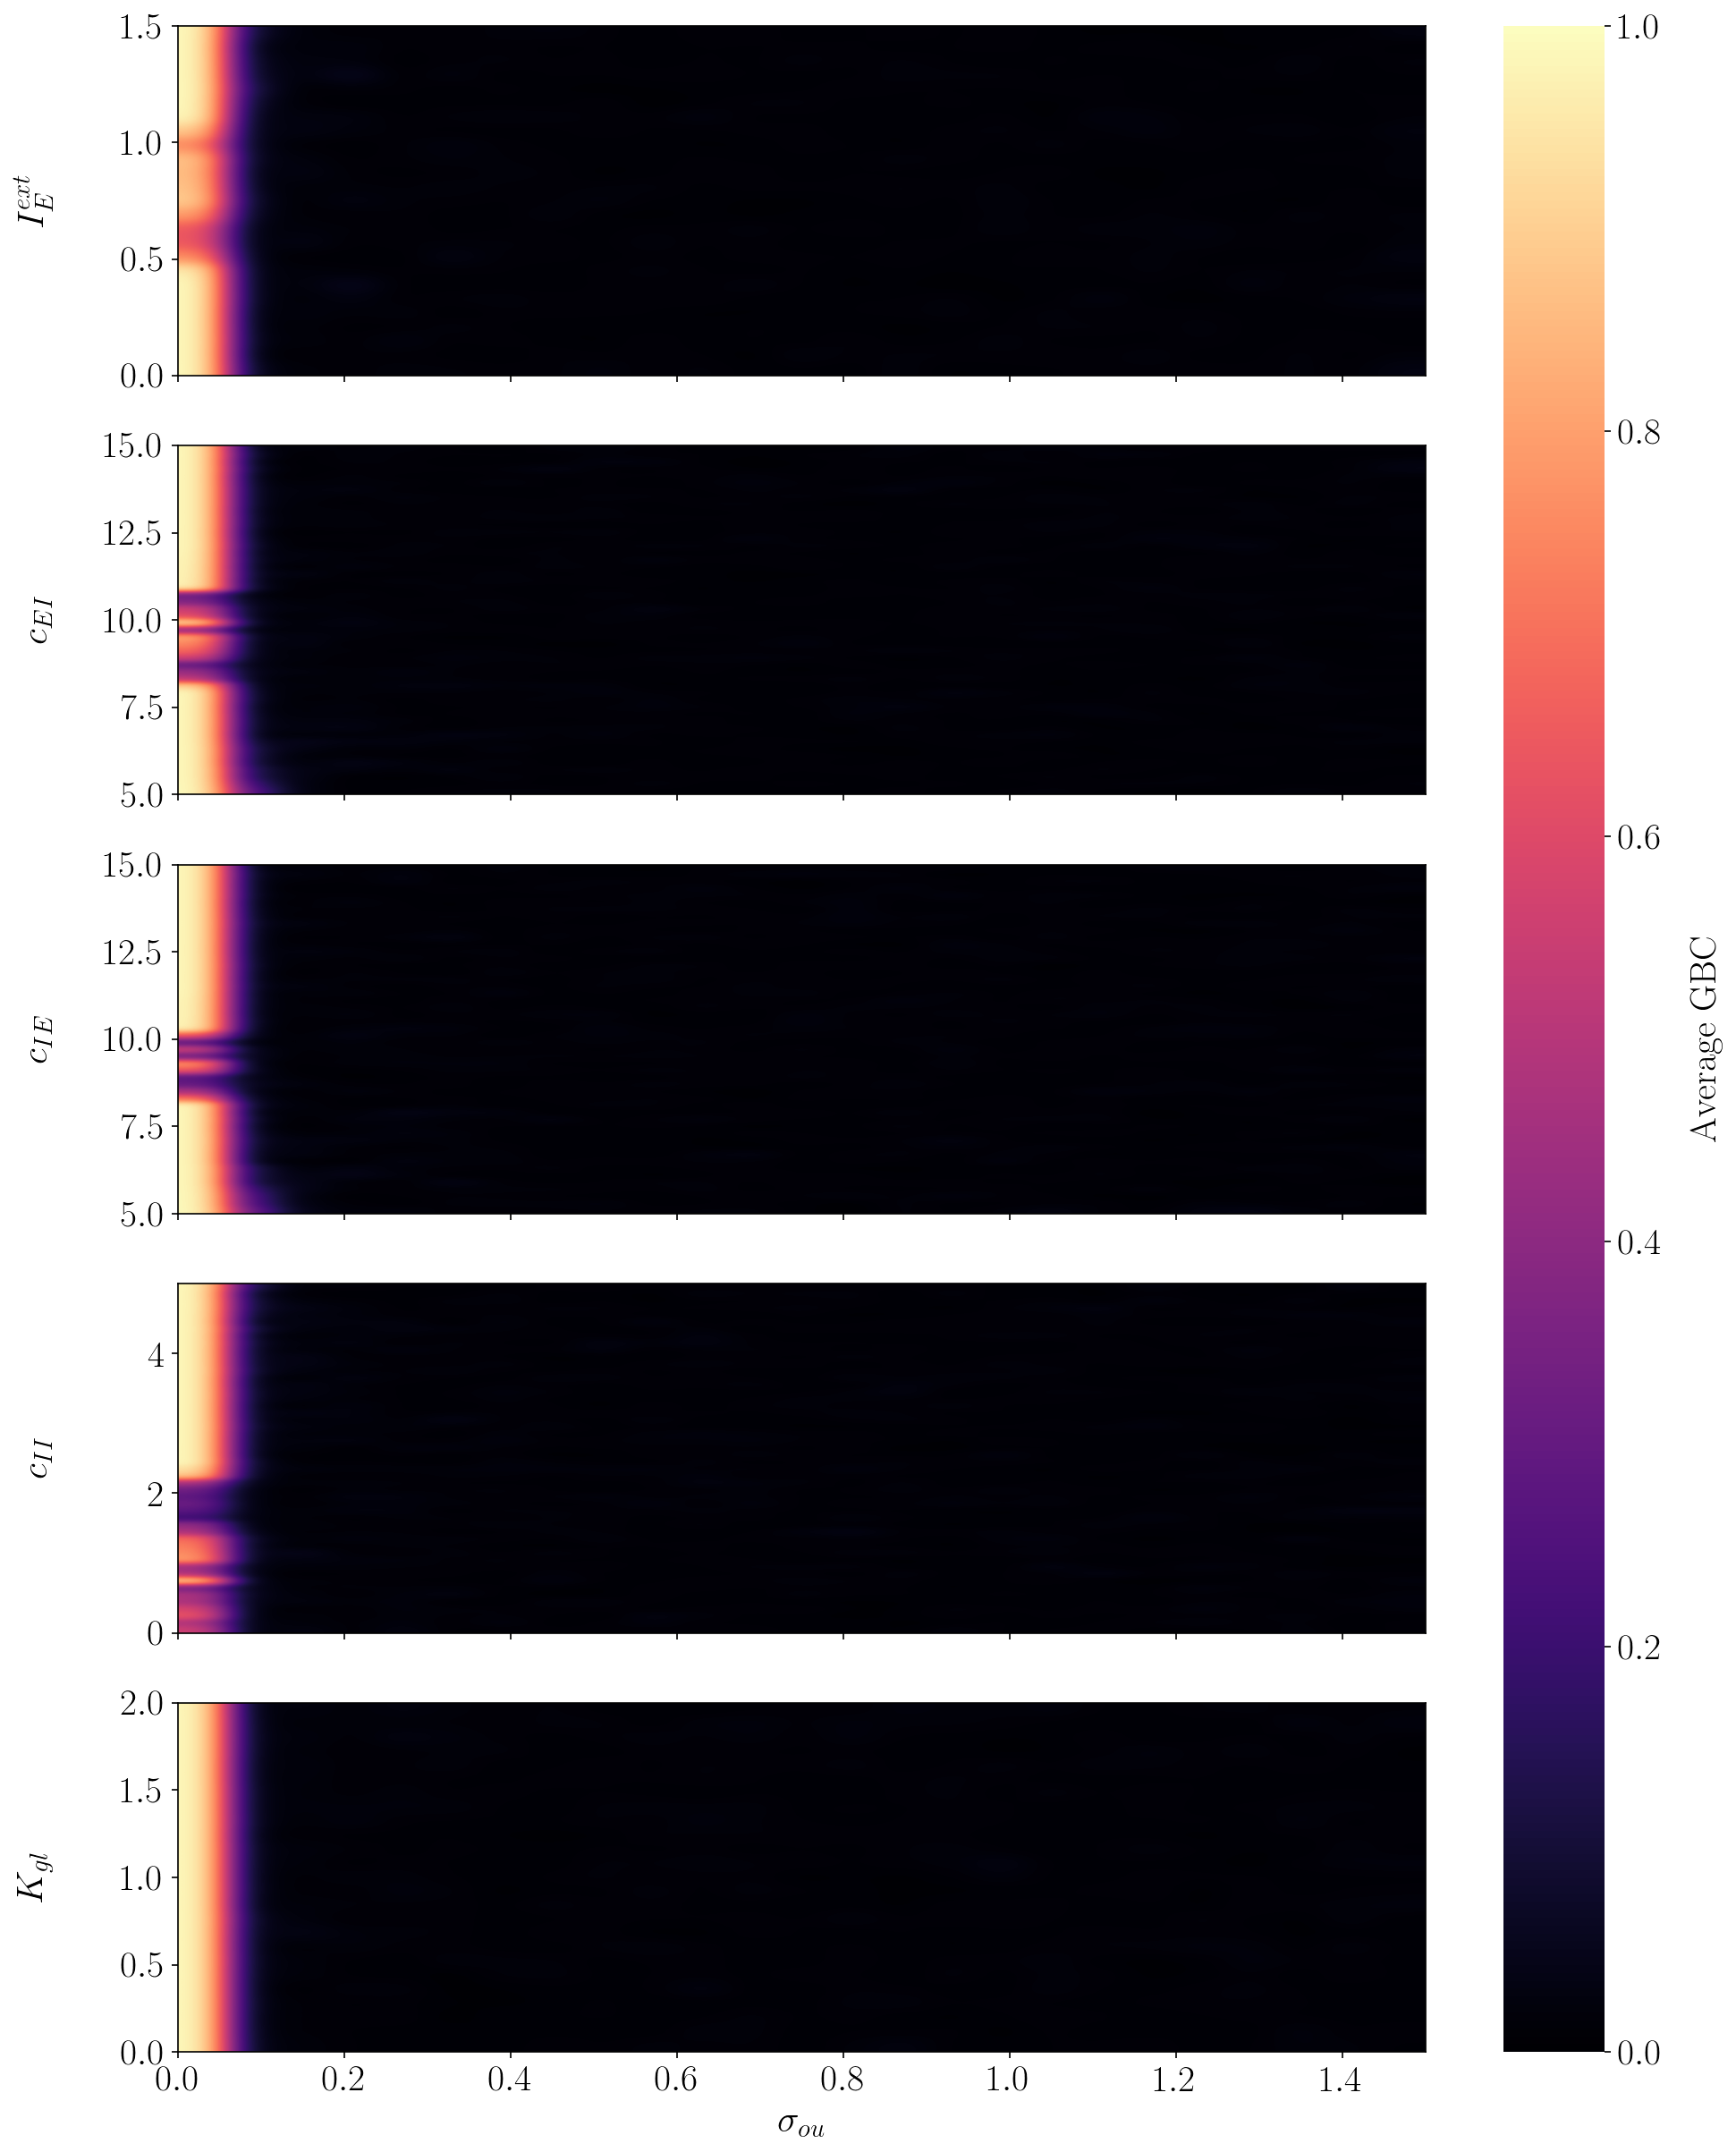

In [17]:
f, axarr = plt.subplots(5,1,figsize=(15, 20))
f.set_facecolor('w')

img = axarr[0].imshow(pivot_table_sigma_ou_exc_ext, vmin=0, vmax=1, aspect="auto", extent=[0,1.5,0,1.5], origin='lower',interpolation='gaussian')
#axarr[0].set_xlabel('sigma_ou',size=20)
axarr[0].set_ylabel('$I^{ext}_{E}$',size=20)
axarr[0].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' ', ' '])

axarr[1].imshow(pivot_table_sigma_ou_cei, vmin=0, vmax=1, aspect="auto", extent=[0,1.5,5,15], origin='lower',interpolation='gaussian')
#axarr[1].set_xlabel('sigma_ou',size=20)
axarr[1].set_ylabel('$c_{EI}$',size=20)
axarr[1].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' ', ' '])

axarr[2].imshow(pivot_table_sigma_ou_cie,vmin=0, vmax=1, aspect="auto", extent=[0,1.5,5,15], origin='lower',interpolation='gaussian')
#axarr[2].set_xlabel('sigma_ou', size=20)
axarr[2].set_ylabel('$c_{IE}$',size=20)
axarr[2].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' ', ' '])

axarr[3].imshow(pivot_table_sigma_ou_cii, vmin=0, vmax=1,aspect="auto", extent=[0,1.5,0,5], origin='lower',interpolation='gaussian')
#axarr[3].set_xlabel('sigma_ou',size=20)
axarr[3].set_ylabel('$c_{II}$',size=20)
axarr[3].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' ', ' '])

axarr[4].imshow(pivot_table_sigma_ou_kgl, vmin=0, vmax=1,aspect="auto", extent=[0,1.5,0,2], origin='lower',interpolation='gaussian')
axarr[4].set_xlabel('$\sigma_{ou}$',size=20)
axarr[4].set_ylabel('$K_{gl}$',size=20)

axarr[0].get_yaxis().set_label_coords(-0.1,0.5)
axarr[1].get_yaxis().set_label_coords(-0.1,0.5)
axarr[2].get_yaxis().set_label_coords(-0.1,0.5)
axarr[3].get_yaxis().set_label_coords(-0.1,0.5)
axarr[4].get_yaxis().set_label_coords(-0.1,0.5)


#f.suptitle('Change in GBC based on parameters: sigma_ou', x = 0.435, y = 0.9, size=18)
#plt.colorbar(img, ax=axarr).ax.set_ylabel('Total GBC', fontsize = 20)
cbar = plt.colorbar(img, ax=axarr[:], orientation = "vertical", location='right')
cbar.ax.set_ylabel('Average GBC', fontsize = 20, labelpad =15)
cbar.outline.set_visible(False)

f.align_ylabels(axarr[:])
#f.subplots_adjust(hspace=0.1)
f.savefig('sigma_ou.png', bbox_inches='tight')